## non-parametric methods using pandas and scipy

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7
plt.style.use("seaborn-v0_8")

### The Spearman Rank Correlation

In [ ]:
from google.colab import files
uploaded = files.upload()
cars = pd.read_csv('mtcars.csv')
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [ ]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


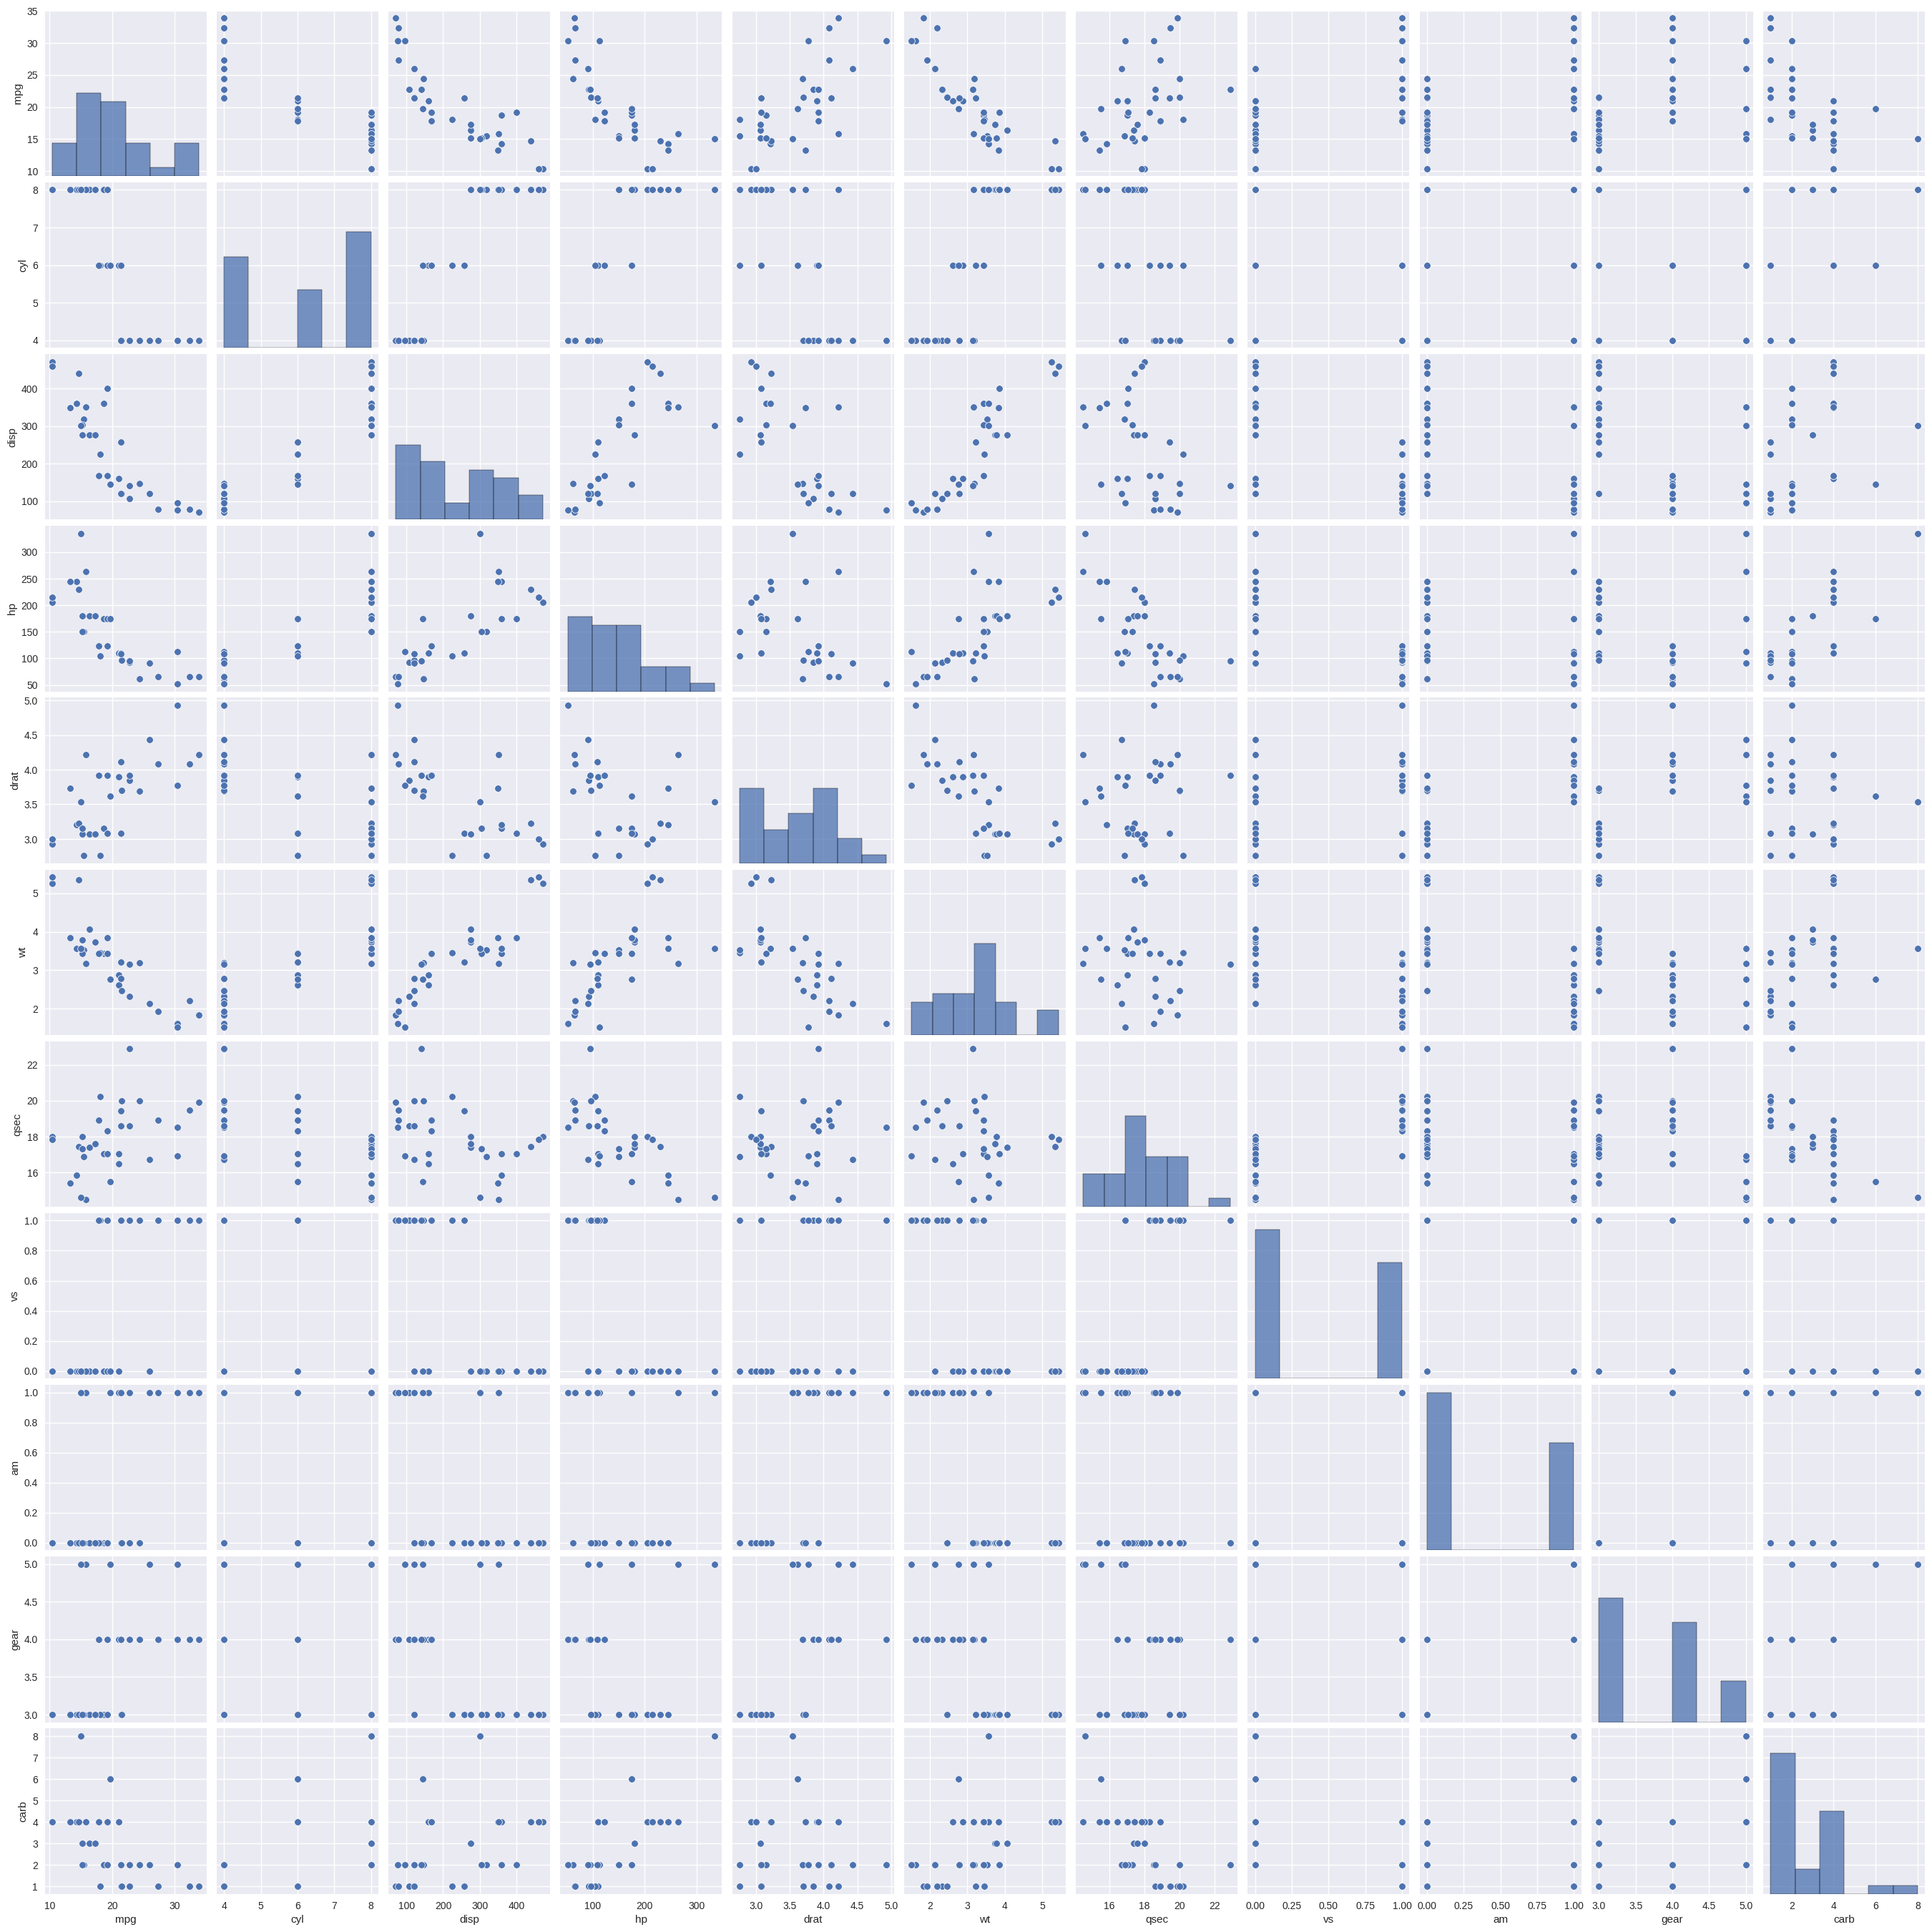

In [ ]:
sb.pairplot(cars)

### non parametric

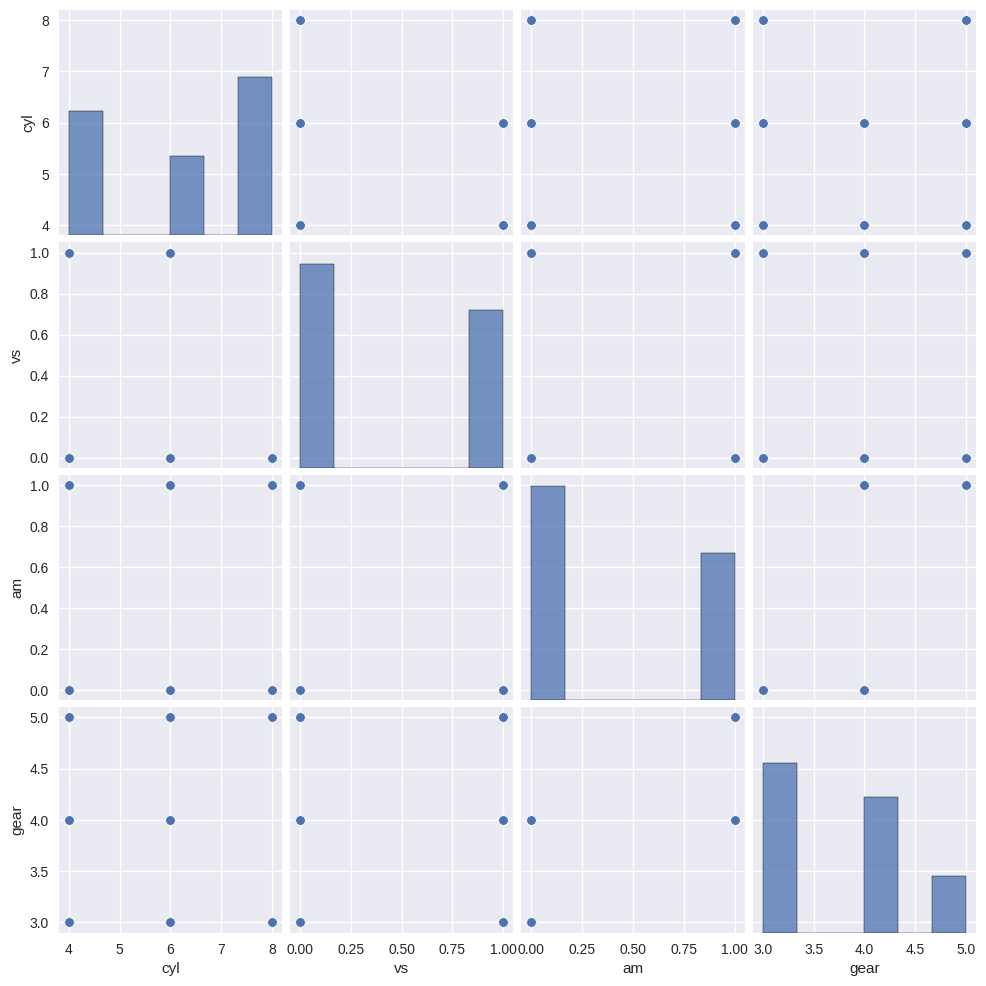

In [ ]:
X = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(X)

In [ ]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)

print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.814


In [ ]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)

print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.522


In [ ]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)

print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.564


correlation between  vs-gear = 0.28
                     am-gear = 0.808
                     vs-am =0.168

### Chi-square test for independence

In [ ]:
table = pd.crosstab(cyl, am)
# ref: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 8.741 p_value 0.013


In [ ]:
table = pd.crosstab(cyl, vs)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 21.340 p_value 0.000


In [ ]:
table = pd.crosstab(cyl, gear)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

P values for         vs-gear = 0.002
                     am-gear = 0.000
                     vs-am =0.556